In [1]:
!pip install tensorflow


In [2]:
import numpy as np
import pandas as pd

In [4]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [7]:
db = pd.read_csv(url,sep=";")

db.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
import tensorflow as tf


In [10]:
train_db = db.sample(frac=0.75, random_state=4)
val_db = db.drop(train_db.index)


In [11]:
max_val = train_db.max(axis= 0)
min_val = train_db.min(axis= 0)

range = max_val - min_val
train_df = (train_db - min_val)/(range)

val_df =  (val_db- min_val)/range

In [12]:
X_train = train_db.drop('quality',axis=1)
X_val = val_db.drop('quality',axis=1)
y_train = train_db['quality']
y_val = val_db['quality']


In [15]:
input_shape = [X_train.shape[1]]

input_shape

[11]

Create Model Neural Network


In [17]:
# Create a linear Model
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

Create Multitlayered Neural Network


In [18]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',
              loss='mae')

Trainning Model

In [20]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),
                   batch_size=256,
                   epochs=15,

                   )

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 5.1928 - val_loss: 2.2283
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6297 - val_loss: 2.0145
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8232 - val_loss: 1.3815
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3117 - val_loss: 0.7869
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9224 - val_loss: 0.6867
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7752 - val_loss: 0.6726
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7021 - val_loss: 0.6129
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6285 - val_loss: 0.6065
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6449 - val_loss: 0.5945
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5953 - val_loss: 0.6027
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6079 - val_loss: 0.5789
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5648 - val_loss: 0.5714
E

Generate Prediction & Analyze Accuracy

In [21]:
model.predict(X_val.iloc[0:3, :])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[5.4492764],
       [5.365025 ],
       [4.980983 ]], dtype=float32)

In [22]:
y_val.iloc[0:3]


,quality
0,5
9,5
12,5


In [23]:
loss_df = pd.DataFrame(losses.history)


<Axes: >

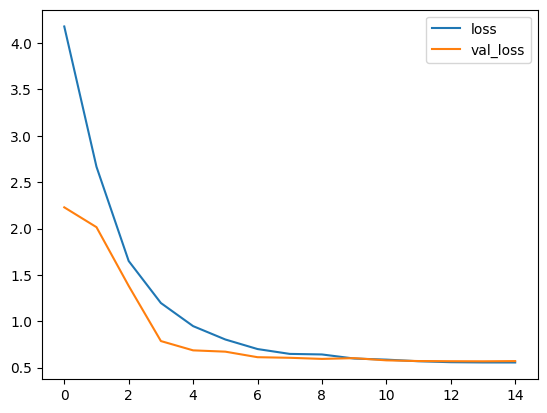

In [24]:
loss_df.loc[:,['loss','val_loss']].plot()
